In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv("cell_phones_total.csv")
df

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,140k,141k,NaN,NaN,NaN,141k,141k,141k,NaN,NaN
1,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,18.4M,19.7M,21.6M,23.9M,22M,22.6M,22.7M,22.7M,22.8M,23M
2,Angola,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,14.1M,13.9M,13M,13.3M,13.3M,14.8M,14.6M,15.3M,23.7M,25.7M
3,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M,2.62M,2.64M,2.78M,2.61M
4,Andorra,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k,80.4k,93.8k,114k,126k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Samoa,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,107k,121k,151k,124k,100k,84k,69k,69k,134k,NaN
210,Yemen,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,17.1M,15M,16.4M,15.4M,15.3M,15.2M,15.2M,17.8M,17.8M,20M
211,South Africa,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,79.3M,88M,82.4M,88.5M,92.4M,97M,96M,100M,100M,108M
212,Zambia,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,10.1M,11.6M,12M,13.4M,15.5M,17.2M,19.1M,20.2M,19.8M,21.2M


In [17]:
df.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [18]:
df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,140k,141k,NaN,NaN,NaN,141k,141k,141k,NaN,NaN
1,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,18.4M,19.7M,21.6M,23.9M,22M,22.6M,22.7M,22.7M,22.8M,23M
2,Angola,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,14.1M,13.9M,13M,13.3M,13.3M,14.8M,14.6M,15.3M,23.7M,25.7M
3,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M,2.62M,2.64M,2.78M,2.61M
4,Andorra,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k,80.4k,93.8k,114k,126k


In [26]:
# Convert 'M' (millions) and 'k' (thousands) to numeric values
def convert_to_number(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas if present
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '')) * 1e3
    return pd.to_numeric(value, errors='coerce')  # Convert numeric values safely

In [30]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda col: col.map(convert_to_number))

In [32]:
df.ffill(inplace=True)

In [34]:
selected_countries = ["USA", "India", "China", "Germany", "Brazil"]
df_selected = df[df["country"].isin(selected_countries)].set_index("country").T

In [35]:
df_selected.index = pd.to_numeric(df_selected.index, errors='coerce')

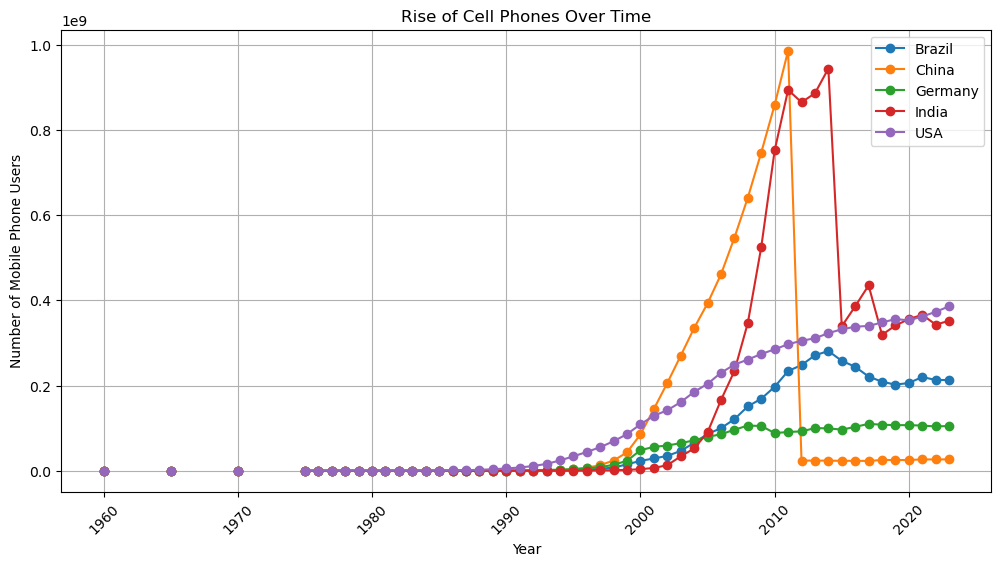

In [36]:
# Plot line chart
plt.figure(figsize=(12, 6))
for country in df_selected.columns:
    plt.plot(df_selected.index, df_selected[country], marker='o', label=country)

# Customize chart
plt.xlabel("Year")
plt.ylabel("Number of Mobile Phone Users")
plt.title("Rise of Cell Phones Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
